In [74]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.wkt import loads
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [75]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [76]:
merged = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/freiburg_2D3D_stats.parquet')

In [77]:
merged.columns

Index(['index', 'oid', 'aktualit', 'gebnutzbez', 'funktion', 'fktkurz',
       'geometry_x', 'ssbCCo', 'ssbCor', 'ssbSqu', 'ssbCCM', 'ssbCCD',
       'sdbAre', 'sdbPer', 'sdbCoA', 'ssbERI', 'ssbElo', 'stbOri', 'mtbSWR',
       'libNCo', 'ldbPWL', 'ltcBuA', 'mtbAli', 'mtbNDi', 'ltbIBD', 'stbCeA',
       'nID', 'stbSAl', 'nodeID', 'id', 'type', 'lod', 'point_count',
       'unique_point_count', 'surface_count', 'actual_volume',
       'convex_hull_volume', 'obb_volume', 'aabb_volume',
       'footprint_perimeter', 'obb_width', 'obb_length', 'surface_area',
       'orientation_values', 'orientation_edges', 'errors', 'valid',
       'geometry_y', '2d_grid_point_count', '3d_grid_point_count',
       'circularity_2d', 'hemisphericality_3d', 'convexity_2d', 'convexity_3d',
       'fractality_2d', 'fractality_3d', 'rectangularity_2d',
       'rectangularity_3d', 'squareness_2d', 'cubeness_3d',
       'horizontal_elongation', 'min_vertical_elongation',
       'max_vertical_elongation', 'form_fa

In [79]:
merged[['index','ssbElo','horizontal_elongation']].head(50)

,index,ssbElo,horizontal_elongation
0,17,0.694247,0.304735
1,20,0.845080,0.154130
2,21,0.208484,0.791763
3,23,0.501916,0.498659
4,24,0.599225,0.400045
5,25,0.907527,0.091572
6,28,0.932041,0.066819
7,29,0.467287,0.533300
8,30,0.717483,0.283376
9,31,0.861565,0.139448


In [80]:
list(merged.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 11,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0]

In [81]:
merged = merged.dropna()

remove stbCeA (cell alignment not relevant)

In [82]:
# Select the relevant variables and standardize them
variables = merged[['ssbCCo', 'ssbCor', 'ssbSqu',
       'ssbCCM', 'ssbCCD', 'sdbAre', 'sdbPer', 'sdbCoA', 'ssbERI', 'ssbElo',
       'stbOri', 'mtbSWR', 'ldbPWL', 'ltcBuA', 'mtbAli', 'mtbNDi','libNCo',
       'ltbIBD', 'stbSAl','actual_volume',
       'convex_hull_volume', 'obb_volume', 'aabb_volume',
       'footprint_perimeter', 'obb_width', 'obb_length', 'surface_area',
       'circularity_2d', 'hemisphericality_3d', 'convexity_2d', 'convexity_3d',
       'fractality_2d', 'fractality_3d', 'rectangularity_2d',
       'rectangularity_3d', 'squareness_2d', 'cubeness_3d',
       'form_factor_3D',
       'equivalent_rectangularity_index_2d', 'equivalent_prism_index_3d',
       'proximity_index_2d_', 'proximity_index_3d', 'exchange_index_2d',
       'horizontal_elongation','spin_index_2d', 'spin_index_3d',
       'perimeter_index_2d', 'circumference_index_3d', 'depth_index_2d',
       'depth_index_3d', 'girth_index_2d', 'girth_index_3d',
       'dispersion_index_2d', 'dispersion_index_3d', 'range_index_2d',
       'range_index_3d', 'roughness_index_2d', 'roughness_index_3d',
       'shared_walls_area', 'closest_distance']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(variables)

In [83]:
# Perform PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [84]:
# Get the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=variables.columns)
print(loadings)

                                         PC1       PC2       PC3       PC4  \
ssbCCo                             -0.159988  0.169205  0.055907 -0.112066   
ssbCor                              0.113451  0.145472 -0.096356 -0.031742   
ssbSqu                              0.034365  0.042118 -0.043165 -0.006066   
ssbCCM                              0.150575  0.107777  0.184809  0.057782   
ssbCCD                              0.165414  0.117947 -0.009952  0.009141   
sdbAre                              0.121515  0.154308  0.222496  0.045827   
sdbPer                              0.165545  0.156012  0.128831  0.033926   
sdbCoA                              0.033576  0.064164  0.069052  0.016775   
ssbERI                             -0.152174 -0.110902  0.212959  0.087473   
ssbElo                             -0.086404  0.222654 -0.053112 -0.217177   
stbOri                              0.009833 -0.039231  0.042646 -0.019730   
mtbSWR                             -0.025114 -0.035152 -0.067263

In [85]:
loading_df = loadings

In [86]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [87]:
explained_variance_ratio

array([3.87935700e-01, 1.52161614e-01, 9.41874505e-02, 6.15028834e-02,
       4.20719737e-02, 3.46733047e-02, 2.42637041e-02, 2.03573913e-02,
       1.93290180e-02, 1.64050123e-02, 1.58371054e-02, 1.47073971e-02,
       1.24374070e-02, 1.07737535e-02, 1.06045487e-02, 9.04776794e-03,
       8.83139627e-03, 7.26416007e-03, 6.82123657e-03, 6.20672521e-03,
       5.65391692e-03, 4.57445942e-03, 4.30581348e-03, 3.68055019e-03,
       3.33135196e-03, 3.01369209e-03, 2.81651244e-03, 2.36074763e-03,
       2.14388103e-03, 1.85042142e-03, 1.52683525e-03, 1.47450154e-03,
       1.37620989e-03, 1.18011593e-03, 1.10472950e-03, 7.59227758e-04,
       6.25648605e-04, 5.19282141e-04, 4.43006683e-04, 4.33516659e-04,
       2.91491649e-04, 2.74986870e-04, 1.72410212e-04, 1.35801290e-04,
       1.33368137e-04, 1.02590610e-04, 7.57992042e-05, 5.59968933e-05,
       5.05244153e-05, 3.24617781e-05, 2.25576678e-05, 1.95099933e-05,
       1.39749629e-05, 1.06989736e-05, 6.94005550e-06, 3.79489946e-06,
      

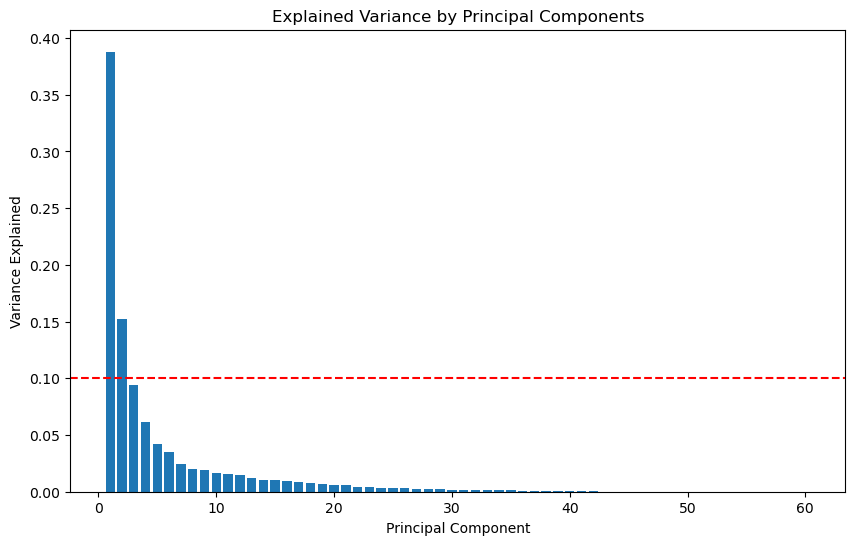

In [128]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.axhline(y=0.1, color='r', linestyle='--')  # Threshold line for reference
plt.show()

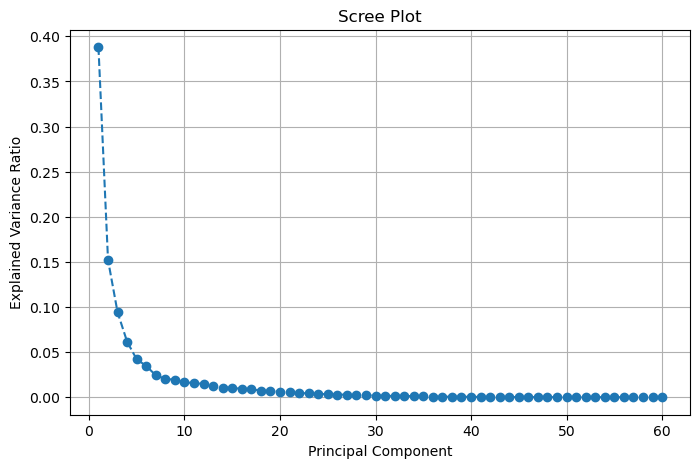

In [88]:
# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

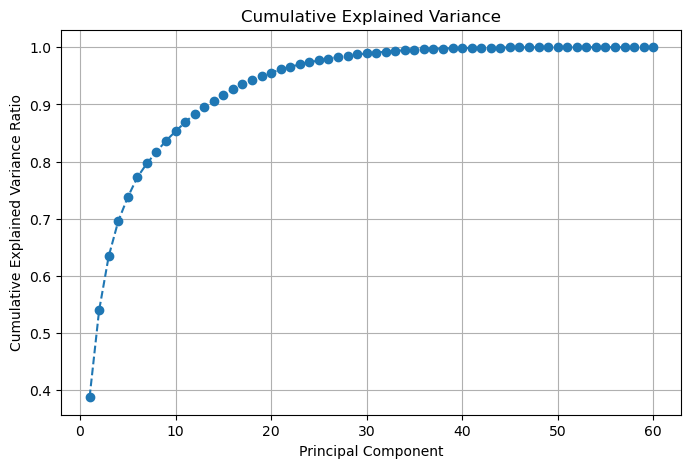

In [89]:
# Create a cumulative variance plot
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

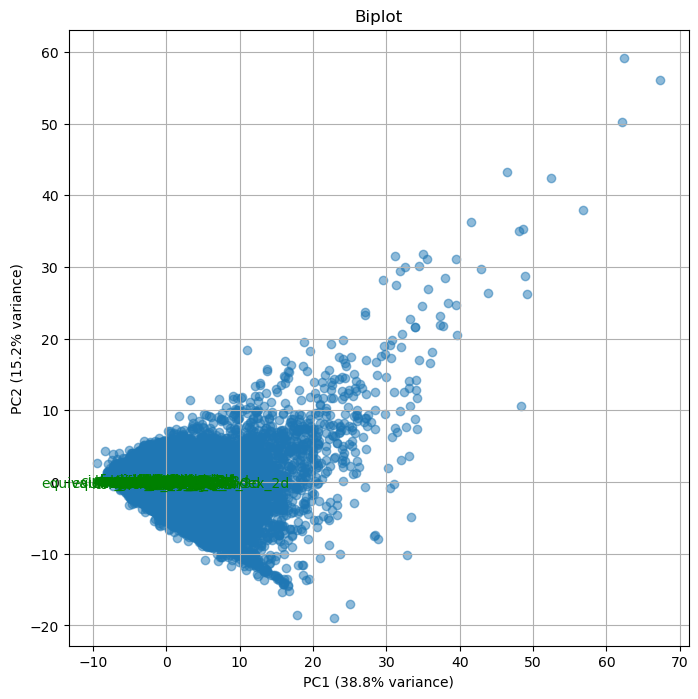

In [90]:
import numpy as np

# Plotting the loadings (biplot)
loadings = pca.components_.T

plt.figure(figsize=(8, 8))
plt.scatter(pca.transform(X_scaled)[:, 0], pca.transform(X_scaled)[:, 1], alpha=0.5)
for i, var in enumerate(variables.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='g', ha='center', va='center')
    
plt.xlabel(f"PC1 ({explained_variance_ratio[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]:.1%} variance)")
plt.title('Biplot')
plt.grid(True)
plt.show()

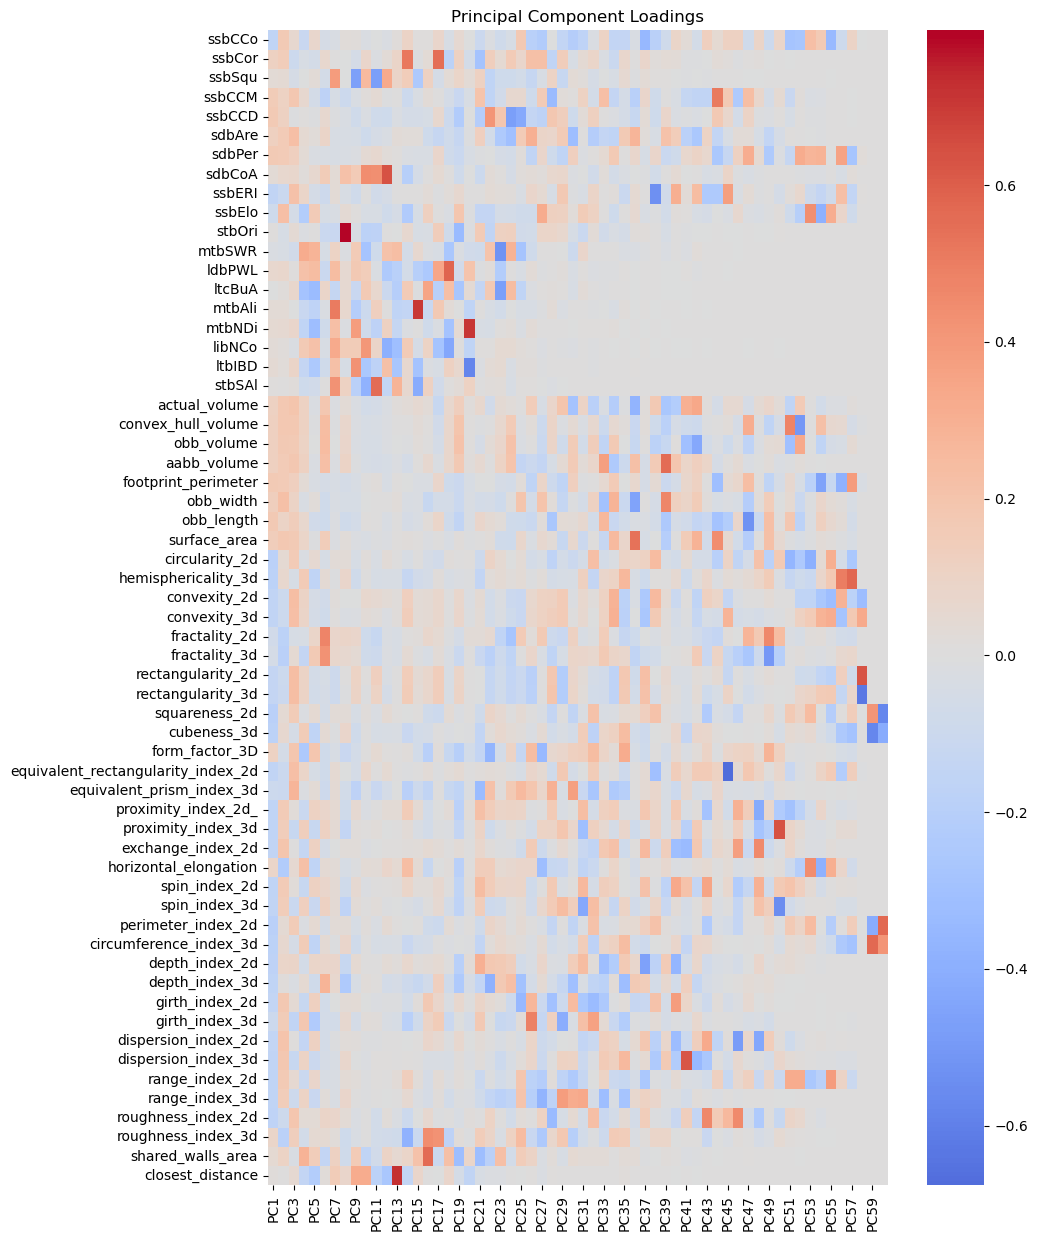

In [92]:
import seaborn as sns

# Convert loadings to DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=variables.columns)

plt.figure(figsize=(10, 15))
sns.heatmap(loadings_df, annot=False, cmap='coolwarm', center=0)
plt.title('Principal Component Loadings')
plt.show()

Look for the loadings which follow the same pattern in the first 5 principle components
The output will display the grouped variables based on their similarity, helping you identify clusters of variables that have similar loading patterns across the first 10 principal components.

In [93]:
loadings_df.index = variables.columns

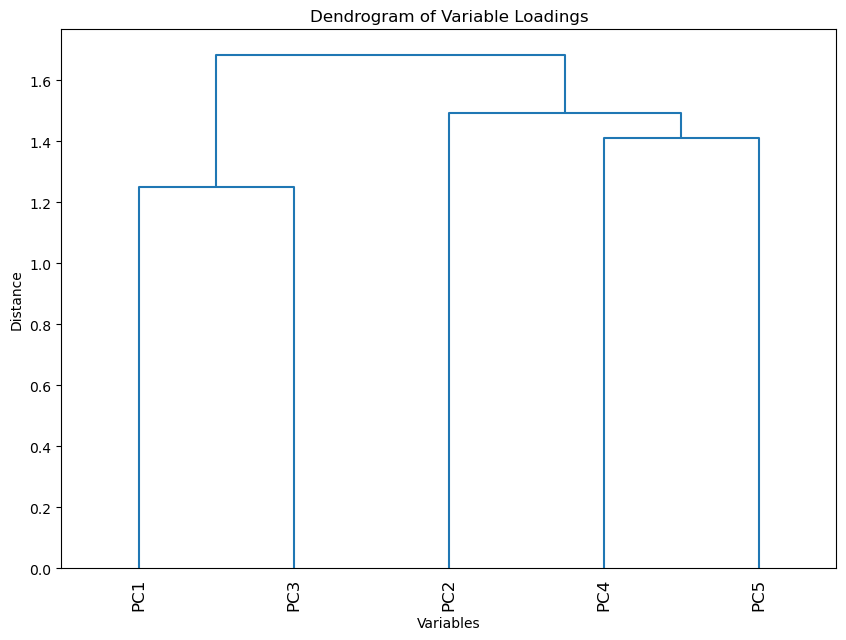

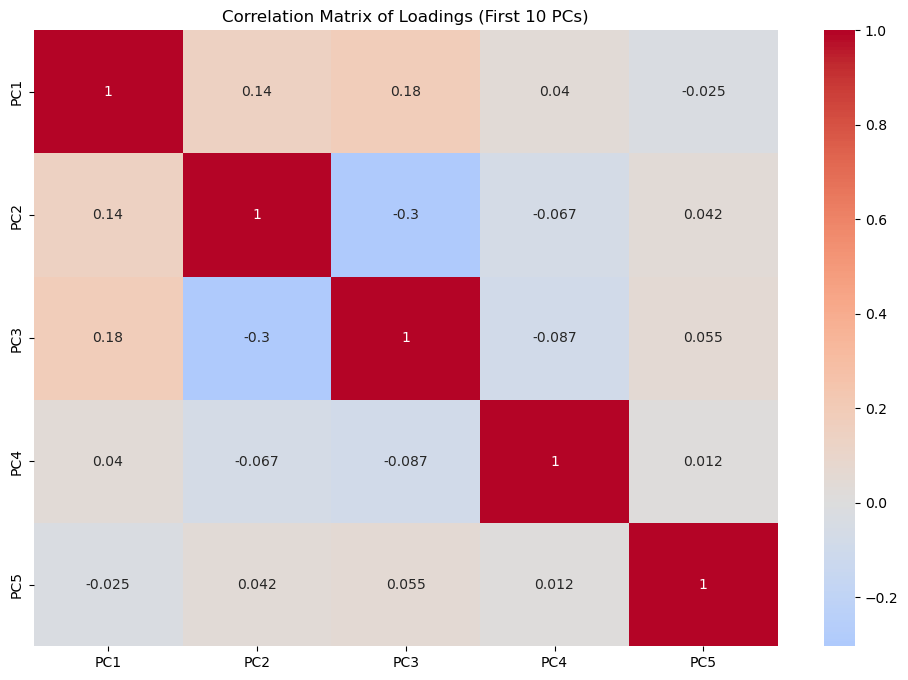

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Load your PCA loadings into a DataFrame (replace with your actual data)
# Assume `loadings` is a 2D numpy array with variables as rows and PCs as columns

loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# the index should be the variable names
loadings_df.index = variables.columns

# Focus on the first 13 PCs
loadings_subset = loadings_df.iloc[:, :5]

correlation_matrix = loadings_subset.corr()

# Create a clustering model
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Fit the model
model.fit(correlation_matrix)

# Generate the linkage matrix
linkage_matrix = linkage(correlation_matrix, method='ward')

# Ensure the number of labels matches the number of observations
labels = loadings_subset.columns

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top', labels=labels, leaf_rotation=90)
plt.title('Dendrogram of Variable Loadings')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

# Optional: To visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Loadings (First 10 PCs)')
plt.show()

In [95]:
loadings_subset

,PC1,PC2,PC3,PC4,PC5
ssbCCo,-0.159988,0.169205,0.055907,-0.112066,0.069960
ssbCor,0.113451,0.145472,-0.096356,-0.031742,-0.054846
ssbSqu,0.034365,0.042118,-0.043165,-0.006066,0.027635
ssbCCM,0.150575,0.107777,0.184809,0.057782,-0.054845
ssbCCD,0.165414,0.117947,-0.009952,0.009141,-0.013605
sdbAre,0.121515,0.154308,0.222496,0.045827,0.021906
sdbPer,0.165545,0.156012,0.128831,0.033926,-0.023033
sdbCoA,0.033576,0.064164,0.069052,0.016775,0.056609
ssbERI,-0.152174,-0.110902,0.212959,0.087473,-0.049092
ssbElo,-0.086404,0.222654,-0.053112,-0.217177,0.163541


In [96]:

from scipy.cluster.hierarchy import fcluster

# Set a threshold for forming flat clusters
# You can adjust the threshold based on the dendrogram
threshold = 1.5  # Adjust based on visual inspection of the dendrogram

# Get cluster labels
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Ensure the clusters array matches the number of rows in loadings_subset
clusters = clusters[:loadings_subset.shape[0]]

# Add cluster labels to the original DataFrame
loadings_subset['Cluster'] = clusters

# Group variables by cluster
grouped_variables = loadings_subset.groupby('Cluster').apply(lambda x: x.index.tolist())

# Display the grouped variables
print("Grouped Variables by Cluster:")
for cluster_num, variables in grouped_variables.items():
    print(f"\nCluster {cluster_num}: {variables}")

# Optional: Plot the loadings for visualization
plt.figure(figsize=(10, 6))
for cluster_num in grouped_variables.index:
    cluster_vars = grouped_variables[cluster_num]
    plt.plot(loadings_subset.loc[cluster_vars].T, label=f'Cluster {cluster_num}')
    
plt.title('Variable Loadings Grouped by Clusters')
plt.xlabel('Principal Components')
plt.ylabel('Loadings')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Reference line at y=0
plt.legend()
plt.grid()
plt.show()

ValueError: Length of values (5) does not match length of index (60)

In [97]:
# Perform clustering on the loadings of the first 10 PCs
model = AgglomerativeClustering(n_clusters=8)  # Adjust the number of clusters as needed
model.fit(loadings_subset)

# Assign cluster labels to the original loadings DataFrame
loadings_df['Cluster'] = model.labels_

# Display variables grouped by clusters
grouped_variables = loadings_df.groupby('Cluster').apply(lambda x: x.index.tolist())
print("Grouped Variables by Cluster:")
print(grouped_variables)

Grouped Variables by Cluster:
Cluster
0    [ssbERI, convexity_2d, convexity_3d, rectangul...
1    [fractality_2d, fractality_3d, form_factor_3D,...
2    [ssbCCo, ssbElo, circularity_2d, squareness_2d...
3     [ssbCor, ssbSqu, ssbCCD, sdbCoA, stbOri, stbSAl]
4          [mtbSWR, ldbPWL, libNCo, shared_walls_area]
5    [ssbCCM, sdbAre, sdbPer, actual_volume, convex...
6    [ltcBuA, mtbAli, mtbNDi, ltbIBD, closest_dista...
7    [hemisphericality_3d, cubeness_3d, proximity_i...
dtype: object


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_6694/3739551178.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_variables = loadings_df.groupby('Cluster').apply(lambda x: x.index.tolist())


In [99]:
grouped_variables

Cluster
0    [ssbERI, convexity_2d, convexity_3d, rectangul...
1    [fractality_2d, fractality_3d, form_factor_3D,...
2    [ssbCCo, ssbElo, circularity_2d, squareness_2d...
3     [ssbCor, ssbSqu, ssbCCD, sdbCoA, stbOri, stbSAl]
4          [mtbSWR, ldbPWL, libNCo, shared_walls_area]
5    [ssbCCM, sdbAre, sdbPer, actual_volume, convex...
6    [ltcBuA, mtbAli, mtbNDi, ltbIBD, closest_dista...
7    [hemisphericality_3d, cubeness_3d, proximity_i...
dtype: object

In [100]:
grouped_variables[0]

['ssbERI',
 'convexity_2d',
 'convexity_3d',
 'rectangularity_2d',
 'rectangularity_3d',
 'equivalent_rectangularity_index_2d',
 'equivalent_prism_index_3d',
 'horizontal_elongation',
 'roughness_index_2d']

In [101]:
grouped_variables[1]

['fractality_2d', 'fractality_3d', 'form_factor_3D', 'roughness_index_3d']

In [102]:
grouped_variables[2]

['ssbCCo',
 'ssbElo',
 'circularity_2d',
 'squareness_2d',
 'proximity_index_2d_',
 'exchange_index_2d',
 'spin_index_2d',
 'perimeter_index_2d',
 'depth_index_2d',
 'girth_index_2d',
 'dispersion_index_2d',
 'range_index_2d']

In [103]:
grouped_variables[3]

['ssbCor', 'ssbSqu', 'ssbCCD', 'sdbCoA', 'stbOri', 'stbSAl']

In [104]:
grouped_variables[4]

['mtbSWR', 'ldbPWL', 'libNCo', 'shared_walls_area']

In [105]:
grouped_variables[5]

['ssbCCM',
 'sdbAre',
 'sdbPer',
 'actual_volume',
 'convex_hull_volume',
 'obb_volume',
 'aabb_volume',
 'footprint_perimeter',
 'obb_width',
 'obb_length',
 'surface_area']

In [106]:
#not so important in first 5 PCs (low loadings)
grouped_variables[6]

['ltcBuA', 'mtbAli', 'mtbNDi', 'ltbIBD', 'closest_distance']

In [107]:
grouped_variables[7]

['hemisphericality_3d',
 'cubeness_3d',
 'proximity_index_3d',
 'spin_index_3d',
 'circumference_index_3d',
 'depth_index_3d',
 'girth_index_3d',
 'dispersion_index_3d',
 'range_index_3d']

In [108]:
# find key of 'mtbSWR'
for key, value in variable_mapping.items():
    if value == 'mtbSWR':
        print(key)




11


In [109]:
loadings_of_interest

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,Cluster
11,-0.025114,-0.035152,-0.067263,0.319962,0.280162,-0.042683,0.106525,-0.016284,0.159257,-0.284631,-0.080380,0.207781,0.233018,-0.058502,0.059539,-0.016947,-0.031942,-0.262747,-0.020041,-0.066172,-0.074249,0.200243,-0.525231,0.28694,-0.280783,-0.082211,0.007089,0.001222,-0.003407,-0.097479,0.072557,0.006453,0.006208,0.008437,-0.021214,-0.021440,-0.009504,0.000099,-0.024261,0.007889,-0.016394,0.023178,0.005198,0.001051,-0.001853,-0.003773,-0.002606,-0.001259,-0.000258,-0.002192,0.000071,0.000697,0.000443,-0.000269,-0.000535,0.000367,0.000096,-0.000042,-3.537895e-17,1.157561e-17,4
13,-0.007077,0.019979,0.070975,-0.287621,-0.334655,0.085562,-0.130602,0.050070,-0.116409,0.166431,0.064148,-0.102819,-0.209728,0.155819,-0.012877,0.348556,-0.197346,0.224413,-0.269090,0.041010,-0.140119,0.172495,-0.480191,0.23370,-0.160715,-0.014820,0.012571,0.015126,0.010044,-0.033143,0.031874,0.004932,-0.009021,0.008365,0.002823,-0.005559,-0.000729,0.008346,-0.006408,-0.006852,-0.003028,0.003578,0.003029,0.000152,0.001682,0.000230,-0.000878,0.000270,0.001705,-0.000110,0.000287,-0.000535,-0.000626,-0.000798,-0.000114,-0.000312,-0.000418,0.000007,5.351896e-17,-5.644674e-17,6


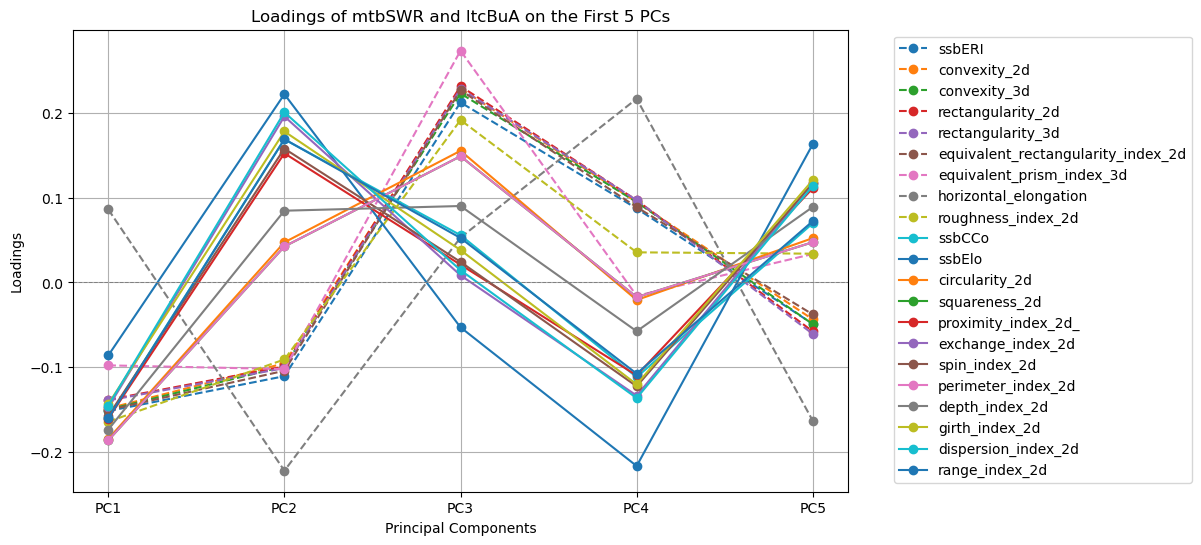

In [112]:
import matplotlib.pyplot as plt

# Loadings for specific variables
variables_of_interest1 = grouped_variables[0]
variables_of_interest2 = grouped_variables[2]
loadings_of_interest1 = loadings_df.loc[variables_of_interest1]
loadings_of_interest2 = loadings_df.loc[variables_of_interest2]

# Plot the loadings for the first 5 PCs
plt.figure(figsize=(10, 6))
for variable in variables_of_interest1:
    plt.plot(loadings_of_interest1.columns[:5], loadings_of_interest1.loc[variable, loadings_of_interest1.columns[:5]], marker='o', ls='--', label=variable)
for variable in variables_of_interest2:
    plt.plot(loadings_of_interest2.columns[:5], loadings_of_interest2.loc[variable, loadings_of_interest2.columns[:5]], marker='o', label=variable)


plt.title('Loadings of mtbSWR and ltcBuA on the First 5 PCs')
plt.xlabel('Principal Components')
plt.ylabel('Loadings')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0 for reference
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

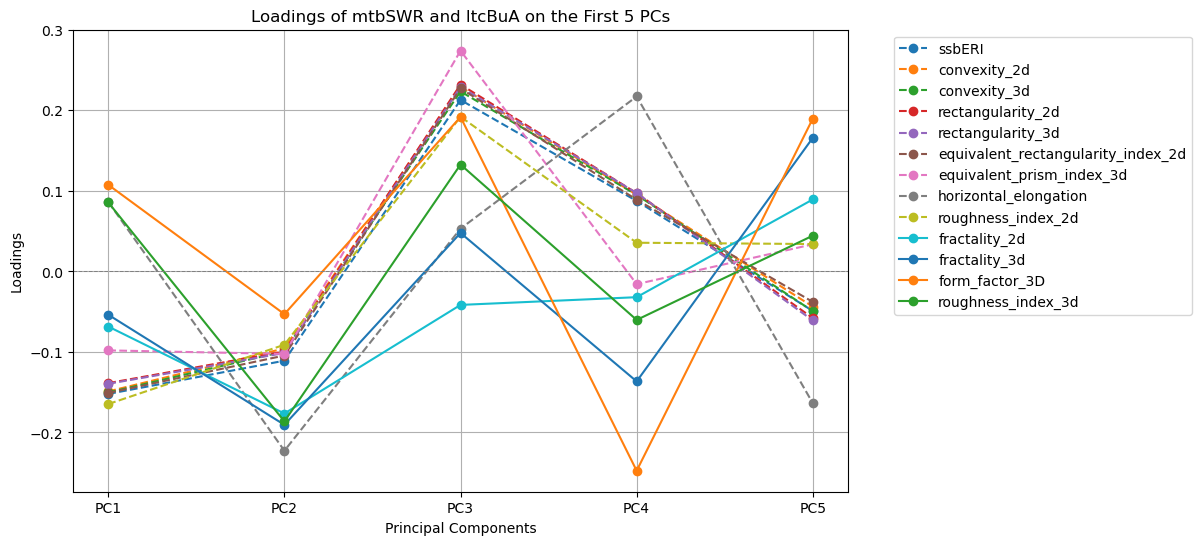

In [110]:
import matplotlib.pyplot as plt

# Loadings for specific variables
variables_of_interest1 = grouped_variables[0]
variables_of_interest2 = grouped_variables[1]
loadings_of_interest1 = loadings_df.loc[variables_of_interest1]
loadings_of_interest2 = loadings_df.loc[variables_of_interest2]

# Plot the loadings for the first 5 PCs
plt.figure(figsize=(10, 6))
for variable in variables_of_interest1:
    plt.plot(loadings_of_interest1.columns[:5], loadings_of_interest1.loc[variable, loadings_of_interest1.columns[:5]], marker='o', ls='--', label=variable)
for variable in variables_of_interest2:
    plt.plot(loadings_of_interest2.columns[:5], loadings_of_interest2.loc[variable, loadings_of_interest2.columns[:5]], marker='o', label=variable)


plt.title('Loadings of mtbSWR and ltcBuA on the First 5 PCs')
plt.xlabel('Principal Components')
plt.ylabel('Loadings')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0 for reference
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

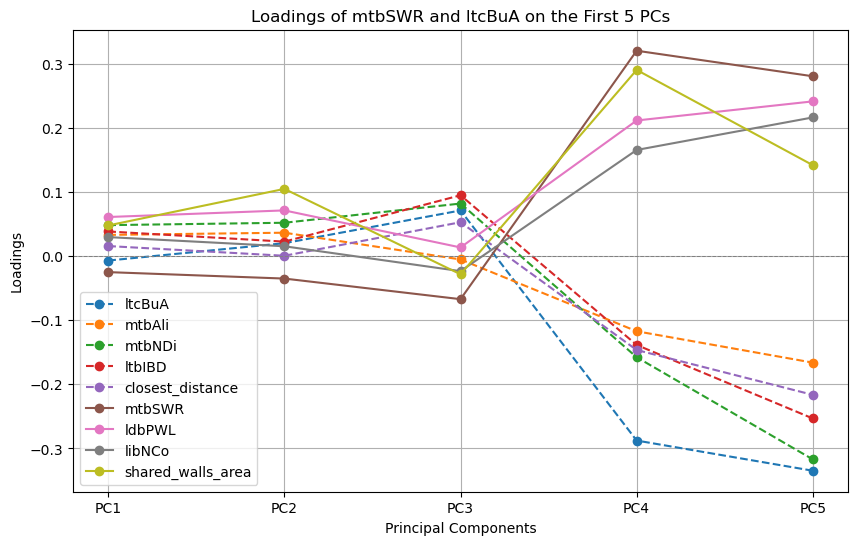

In [111]:
# Loadings for specific variables
variables_of_interest1 = ['ltcBuA', 'mtbAli', 'mtbNDi', 'ltbIBD', 'closest_distance']
variables_of_interest2 = ['mtbSWR', 'ldbPWL', 'libNCo', 'shared_walls_area']
loadings_of_interest1 = loadings_df.loc[variables_of_interest1]
loadings_of_interest2 = loadings_df.loc[variables_of_interest2]

# Plot the loadings for the first 5 PCs
plt.figure(figsize=(10, 6))
for variable in variables_of_interest1:
    plt.plot(loadings_of_interest1.columns[:5], loadings_of_interest1.loc[variable, loadings_of_interest1.columns[:5]], marker='o', ls='--', label=variable)
for variable in variables_of_interest2:
    plt.plot(loadings_of_interest2.columns[:5], loadings_of_interest2.loc[variable, loadings_of_interest2.columns[:5]], marker='o', label=variable)


plt.title('Loadings of mtbSWR and ltcBuA on the First 5 PCs')
plt.xlabel('Principal Components')
plt.ylabel('Loadings')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0 for reference
plt.legend()
plt.grid()
plt.show()

In [ ]:
# plot all loadings of PCs 1-5 and colour by cluster

plt.figure(figsize=(10, 6))
for variable in loadings_df.index:
    plt.plot(loadings_df.columns[:5], loadings_df.loc[variable, loadings_df.columns[:5]], marker='o', label=variable)
    
    

In [ ]:
# plot all loadings of PCs 1-5 and colour by cluster

plt.figure(figsize=(10, 6))
for cluster_num in grouped_variables.index:
    cluster_vars = grouped_variables[cluster_num]
    for variable in cluster_vars:
        if variable in loadings_df.index:
            plt.plot(loadings_df.columns[:5], loadings_df.loc[variable, loadings_df.columns[:5]], marker='o', label=variable)


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_6694/3973039766.py:24: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


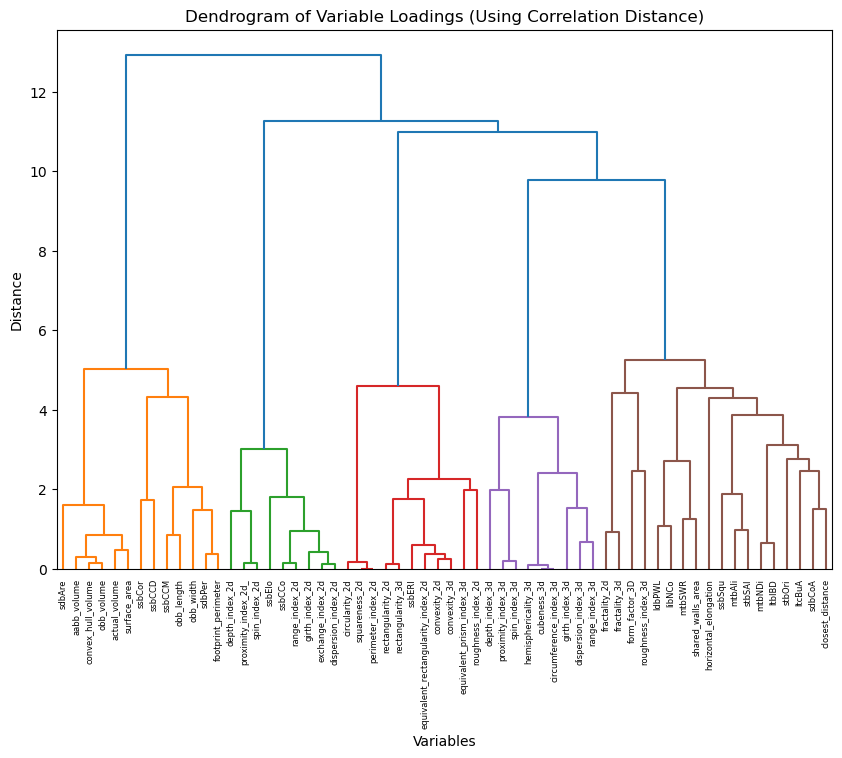

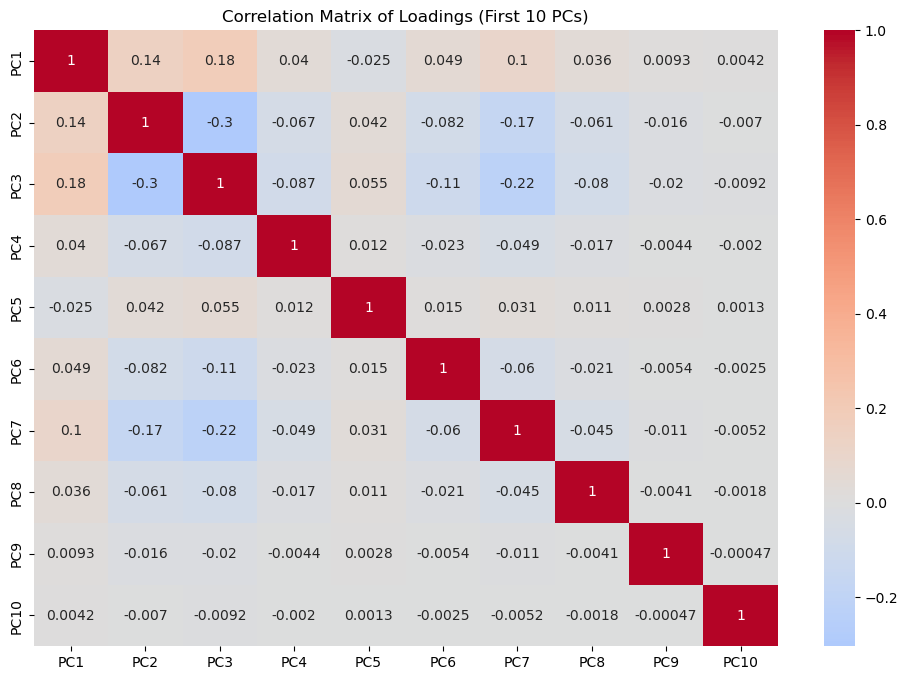

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# Load your PCA loadings into a DataFrame
# Assume `loadings` is a 2D numpy array with variables as rows and PCs as columns
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
# the index should be the variable names
loadings_df.index = variables.columns

# Focus on the first 10 PCs
loadings_subset = loadings_df.iloc[:, :10]

# Calculate the distance matrix using correlation
distance_matrix = pairwise_distances(loadings_subset, metric='cosine')

# Alternatively, for cosine distance:
# distance_matrix = pairwise_distances(loadings_subset, metric='cosine')

# Perform hierarchical clustering using the distance matrix
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top', labels=loadings_subset.index, leaf_rotation=90)
plt.title('Dendrogram of Variable Loadings (Using Correlation Distance)')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

# Optional: To visualize the correlation heatmap of loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_subset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Loadings (First 10 PCs)')
plt.show()


In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame named `data`
# and it includes the variables 'ssbElo' and 'horizontal_elongation'

# Visualizing the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='horizontal_elongation', y='ssbElo')
plt.title('Scatter Plot of ssbElo vs Horizontal Elongation')
plt.xlabel('Horizontal Elongation')
plt.ylabel('ssbElo (1 - Horizontal Elongation)')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# Examine PCA loadings if you already performed PCA
# loadings_df should contain PCA loadings for your variables
loadings_df[['ssbElo', 'horizontal_elongation']]

NameError: name 'data' is not defined

<Figure size 800x600 with 0 Axes>

In [118]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
ssbCCo,-0.159988,0.169205,0.055907,-0.112066,0.069960,-0.044329,-0.027516,0.025513,0.016738,-0.019937,-0.005533,-0.024705,0.017461,0.099070,0.011587,0.011013,0.079107,-0.036891,0.050179,-0.006994,-0.104126,-0.015481,-0.073368,-0.039607,0.170872,-0.196811,-0.223533,-0.006577,-0.145196,-0.211991,-0.165664,-0.024402,0.101998,-0.142417,-0.135306,-0.028841,-0.351858,-0.187393,-0.077747,0.085642,0.029728,-0.057431,0.125076,0.046540,0.117783,0.114531,-0.075440,0.093859,-0.099566,0.088311,-0.280454,-0.268303,0.225032,0.167402,-0.345125,-0.089290,0.100784,-0.006274,0.000000e+00,0.000000e+00
ssbCor,0.113451,0.145472,-0.096356,-0.031742,-0.054846,0.065549,0.008226,-0.005476,-0.051300,0.078989,-0.016852,0.030001,0.089550,0.517015,-0.010683,0.036349,0.545071,-0.179903,0.116595,-0.057312,-0.289972,0.134994,0.047501,0.155564,0.080129,0.221433,0.217817,-0.157584,0.140636,-0.034888,0.042536,0.085335,-0.024172,-0.111861,0.071811,0.006700,0.076395,0.018476,0.035131,0.028826,-0.009362,-0.010436,-0.004907,0.030406,0.016450,-0.009393,0.012366,0.015904,-0.005374,-0.000133,-0.006807,-0.000932,-0.000919,-0.000767,-0.000232,0.000587,-0.001437,-0.000124,-9.797215e-17,1.226675e-17
ssbSqu,0.034365,0.042118,-0.043165,-0.006066,0.027635,-0.056331,0.383571,-0.007843,-0.467747,0.255831,-0.477220,0.325541,0.094642,0.144403,-0.247094,0.118138,-0.051308,0.032924,0.088612,0.036008,0.114103,-0.154113,-0.087524,-0.088213,-0.064111,-0.126717,-0.035035,0.105542,-0.118553,0.033346,0.016859,-0.045121,-0.006868,-0.036917,0.051341,-0.010195,0.036830,0.009165,0.011452,-0.007881,-0.011189,-0.005001,-0.010172,0.005905,0.002975,-0.000413,-0.002779,-0.004710,0.002122,-0.001390,0.001743,0.001670,0.003520,0.000018,-0.003409,0.000070,0.000622,-0.000074,1.159690e-16,2.825310e-17
ssbCCM,0.150575,0.107777,0.184809,0.057782,-0.054845,-0.175146,-0.039298,-0.096761,-0.027977,0.017308,0.043017,-0.012134,0.008001,-0.097388,-0.027794,0.028500,0.006482,-0.049216,-0.114343,-0.031750,0.202592,-0.159121,-0.067021,0.056073,0.057539,-0.087189,0.164123,-0.338969,0.022513,0.012193,0.107013,-0.054592,0.224946,-0.140704,-0.049137,-0.194067,0.074575,-0.076074,0.007474,-0.029645,-0.134308,-0.150360,-0.149952,0.511113,0.173179,-0.235060,0.231862,0.071746,-0.054007,0.043983,-0.116742,0.017815,-0.022440,-0.019559,0.007169,-0.000490,-0.004216,-0.000584,5.334724e-16,1.387149e-16
ssbCCD,0.165414,0.117947,-0.009952,0.009141,-0.013605,0.055214,-0.009558,-0.027253,-0.074405,-0.023804,-0.078033,-0.084177,-0.020559,-0.054195,-0.051324,-0.039620,0.062617,-0.095983,-0.226129,-0.002933,-0.214704,0.412947,0.189110,-0.475159,-0.422874,-0.135297,-0.173437,0.185841,0.129779,-0.088577,0.028102,0.120495,0.003350,-0.015648,-0.050095,-0.121697,0.033097,-0.086028,0.072393,-0.024421,-0.010087,-0.020254,-0.002803,0.174321,0.071889,-0.058018,0.099001,-0.009365,-0.015499,0.009376,-0.038394,0.009690,-0.011752,-0.009003,0.008721,0.000099,-0.004734,0.000087,6.768409e-19,-9.935785e-17
sdbAre,0.121515,0.154308,0.222496,0.045827,0.021906,0.089922,-0.032664,-0.034613,-0.041041,-0.083651,-0.044929,-0.029985,0.029688,0.021371,0.025195,-0.087103,-0.124267,-0.076379,-0.124819,-0.012127,0.126705,-0.063107,-0.239552,-0.306236,0.155561,0.301222,0.092390,0.072524,0.153764,-0.316710,-0.002171,-0.214952,-0.136148,-0.158864,0.164345,0.279022,0.024017,-0.036921,0.205326,0.142977,-0.182004,-0.257365,0.102527,-0.140844,-0.033929,0.027492,0.031294,-0.040602,-0.143179,-0.048439,0.011525,0.008748,-0.004938,-0.013893,-0.001676,0.002874,0.005300,-0.000472,-2.045675e-16,-2.166090e-17
sdbPer,0.165545,0.156012,0.128831,0.033926,-0.023033,-0.030523,-0.031966,-0.030501,-0.014772,0.041524,0.057827,0.023657,0.009658,-0.022521,-0.029600,-0.025731,0.080135,-0.082961,-0.1074

In [120]:
elongation_loadings = loadings_df.loc[['ssbElo', 'horizontal_elongation']]

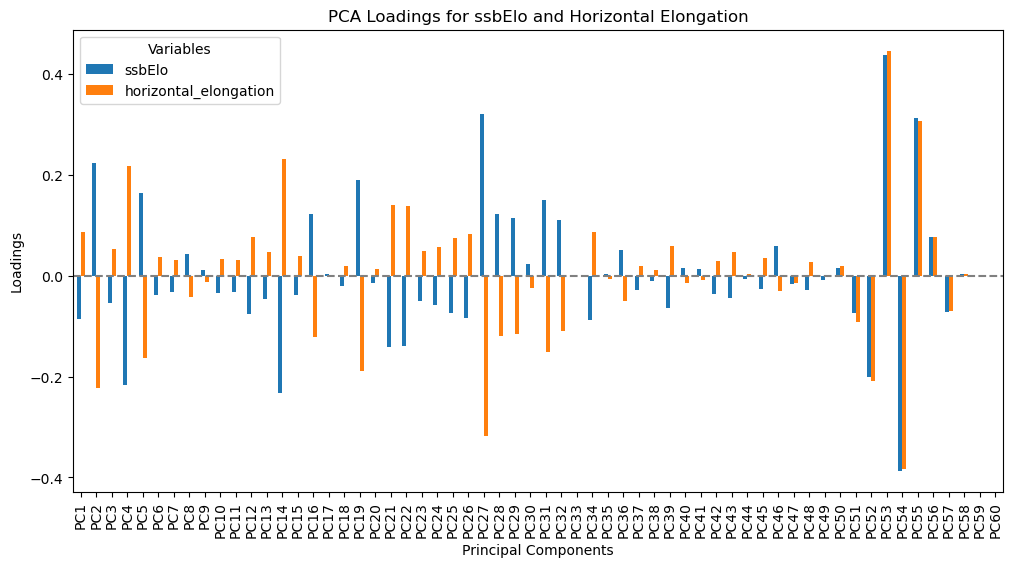

In [121]:
# Plot the loadings
elongation_loadings.T.plot(kind='bar', figsize=(12, 6))
plt.title('PCA Loadings for ssbElo and Horizontal Elongation')
plt.ylabel('Loadings')
plt.xlabel('Principal Components')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Variables')
plt.show()

In [126]:
merged[['ssbElo','horizontal_elongation']].describe()

,ssbElo,horizontal_elongation
count,35819.000000,35819.000000
mean,0.666740,0.333256
std,0.194677,0.194696
min,0.049960,0.000000
25%,0.516343,0.174191
50%,0.665074,0.334870
75%,0.826068,0.483445
max,0.999988,0.950084


In [130]:
X_scaled

array([[ 6.82751618e-01, -5.26712526e-01, -4.03685502e-01, ...,
        -3.27404955e-01,  1.12847935e-01, -2.61736620e-01],
       [ 3.82326015e-01,  1.23095427e+00,  5.46712656e-01, ...,
         2.39629003e-01, -6.56262864e-01,  6.29598705e+01],
       [-4.30612391e+00,  2.18968161e+00,  8.27038603e-01, ...,
         4.00441666e+00, -6.56262864e-01,  1.85286700e+01],
       ...,
       [ 8.44237753e-01, -5.26712526e-01, -2.14615307e-01, ...,
         3.46145213e-01, -6.56262864e-01,  3.12102744e-01],
       [-3.29270107e+00,  1.12439034e-01, -3.49875200e-01, ...,
         4.35575786e+00, -1.29528435e-01, -2.60725466e-01],
       [-2.57286110e+00,  9.11378485e-01,  1.10025058e+00, ...,
         7.31923826e-01, -1.41887449e-02, -2.61736620e-01]])

In [132]:
# compute the correlation matrix of the standardized data using .corr()
correlation_matrix = variables.corr()


In [133]:
correlation_matrix

,ssbCCo,ssbCor,ssbSqu,ssbCCM,ssbCCD,sdbAre,sdbPer,sdbCoA,ssbERI,ssbElo,stbOri,mtbSWR,ldbPWL,ltcBuA,mtbAli,mtbNDi,libNCo,ltbIBD,stbSAl,actual_volume,convex_hull_volume,obb_volume,aabb_volume,footprint_perimeter,obb_width,obb_length,surface_area,circularity_2d,hemisphericality_3d,convexity_2d,convexity_3d,fractality_2d,fractality_3d,rectangularity_2d,rectangularity_3d,squareness_2d,cubeness_3d,form_factor_3D,equivalent_rectangularity_index_2d,equivalent_prism_index_3d,proximity_index_2d_,proximity_index_3d,exchange_index_2d,horizontal_elongation,spin_index_2d,spin_index_3d,perimeter_index_2d,circumference_index_3d,depth_index_2d,depth_index_3d,girth_index_2d,girth_index_3d,dispersion_index_2d,dispersion_index_3d,range_index_2d,range_index_3d,roughness_index_2d,roughness_index_3d,shared_walls_area,closest_distance
ssbCCo,1.000000,-0.180998,-0.086704,-0.368203,-0.449359,-0.172590,-0.347218,-0.041026,0.419323,0.757207,-0.039064,-0.054989,-0.151769,0.132187,-0.065490,-0.060087,-0.124053,-0.061481,-0.024961,-0.165494,-0.179964,-0.185151,-0.214418,-0.353395,-0.104020,-0.476014,-0.220991,0.832290,0.656405,0.436330,0.436329,-0.034558,-0.024293,0.417947,0.418291,0.824317,0.647344,-0.285746,0.422977,0.300181,0.888844,0.649487,0.932724,-0.757059,0.895958,0.650948,0.824317,0.647344,0.812863,0.523256,0.884441,0.432495,0.944668,0.736829,0.994497,0.724915,0.501359,-0.527534,-0.102833,-0.017327
ssbCor,-0.180998,1.000000,0.240009,0.376384,0.607255,0.369093,0.583869,0.135629,-0.665425,0.036894,-0.047167,-0.163791,0.183301,0.051517,0.160765,0.175389,0.062414,0.088048,0.038238,0.422271,0.456589,0.463429,0.417584,0.585746,0.559430,0.510272,0.520074,-0.533681,-0.374319,-0.596113,-0.599818,-0.334974,-0.358473,-0.570337,-0.572673,-0.542143,-0.374382,0.114501,-0.663683,-0.563892,-0.206446,-0.150362,-0.133618,-0.037098,-0.195667,-0.140783,-0.542143,-0.374382,-0.379421,-0.323517,-0.174439,0.004319,-0.120859,-0.093281,-0.182066,-0.152030,-0.677357,-0.083166,0.196781,0.061006
ssbSqu,-0.086704,0.240009,1.000000,0.110586,0.189430,0.088362,0.142871,0.027623,-0.134207,0.009007,-0.028092,-0.005998,0.109835,-0.049830,0.209211,0.033045,0.101481,0.002601,0.056187,0.095810,0.092136,0.098419,0.081166,0.144550,0.173384,0.156471,0.111832,-0.110787,-0.100263,-0.180506,-0.181354,-0.132905,-0.129624,-0.340034,-0.340010,-0.112233,-0.100187,0.038525,-0.132090,-0.072167,-0.073810,-0.056710,-0.038776,-0.008669,-0.072713,-0.056454,-0.112233,-0.100187,-0.105145,-0.114571,-0.053257,-0.016017,-0.039210,-0.040807,-0.089511,-0.072731,-0.147801,-0.006479,0.106062,0.000195
ssbCCM,-0.368203,0.376384,0.110586,1.000000,0.633507,0.798039,0.912143,0.188045,-0.362803,-0.188554,0.007866,-0.158791,0.320367,0.027967,0.123074,0.303821,0.085461,0.249932,0.037764,0.732800,0.687735,0.660809,0.706350,0.919500,0.820183,0.952638,0.787927,-0.448094,-0.572039,-0.334047,-0.345997,-0.659013,-0.538876,-0.303691,-0.310430,-0.461532,-0.584515,0.492928,-0.340523,-0.143462,-0.452883,-0.496576,-0.347449,0.188490,-0.426937,-0.457700,-0.461532,-0.584515,-0.461355,-0.577204,-0.308287,-0.241640,-0.324276,-0.414261,-0.381678,-0.470643,-0.487618,0.262015,0.315078,0.084197
ssbCCD,-0.449359,0.607255,0.189430,0.633507,1.000000,0.640279,0.807346,0.131662,-0.709715,-0.106545,-0.013750,-0.144057,0.296399,0.007034,0.156715,0.212481,0.118555,0.135497,0.034222,0.627335,0.641893,0.644361,0.636004,0.816333,0.726546,0.801694,0.727398,-0.660903,-0.575779,-0.701185,-0.704165,-0.393762,-0.367306,-0.668550,-0.670510,-0.676351,-0.581652,0.331068,-0.709238,-0.448581,-0.459128,-0.415348,-0.376105,0.106303,-0.435061,-0.390494,-0.676351,-0.581652,-0.573439,-0.512105,-0.367636,-0.192375,-0.368742,-0.370989,-0.457322,-0.429587,-0.718963,0.148242,0.274823,0.048019
sdbAre,-0.172590,0.369093,0.088362,0.798039,0.640279,1.000000,0.838409,0.217212,-0.318358,-0.043376,0.003042,-0.120063,0.268752,0.042658,0.092199,0.238567,0.071346,0.188824,0.031805,0.899012,0.848576,0.819545,0.810578,0.839105,0.814260,0.797952,0.910166,-0.276520,-0.446553,-0.27

<Axes: >

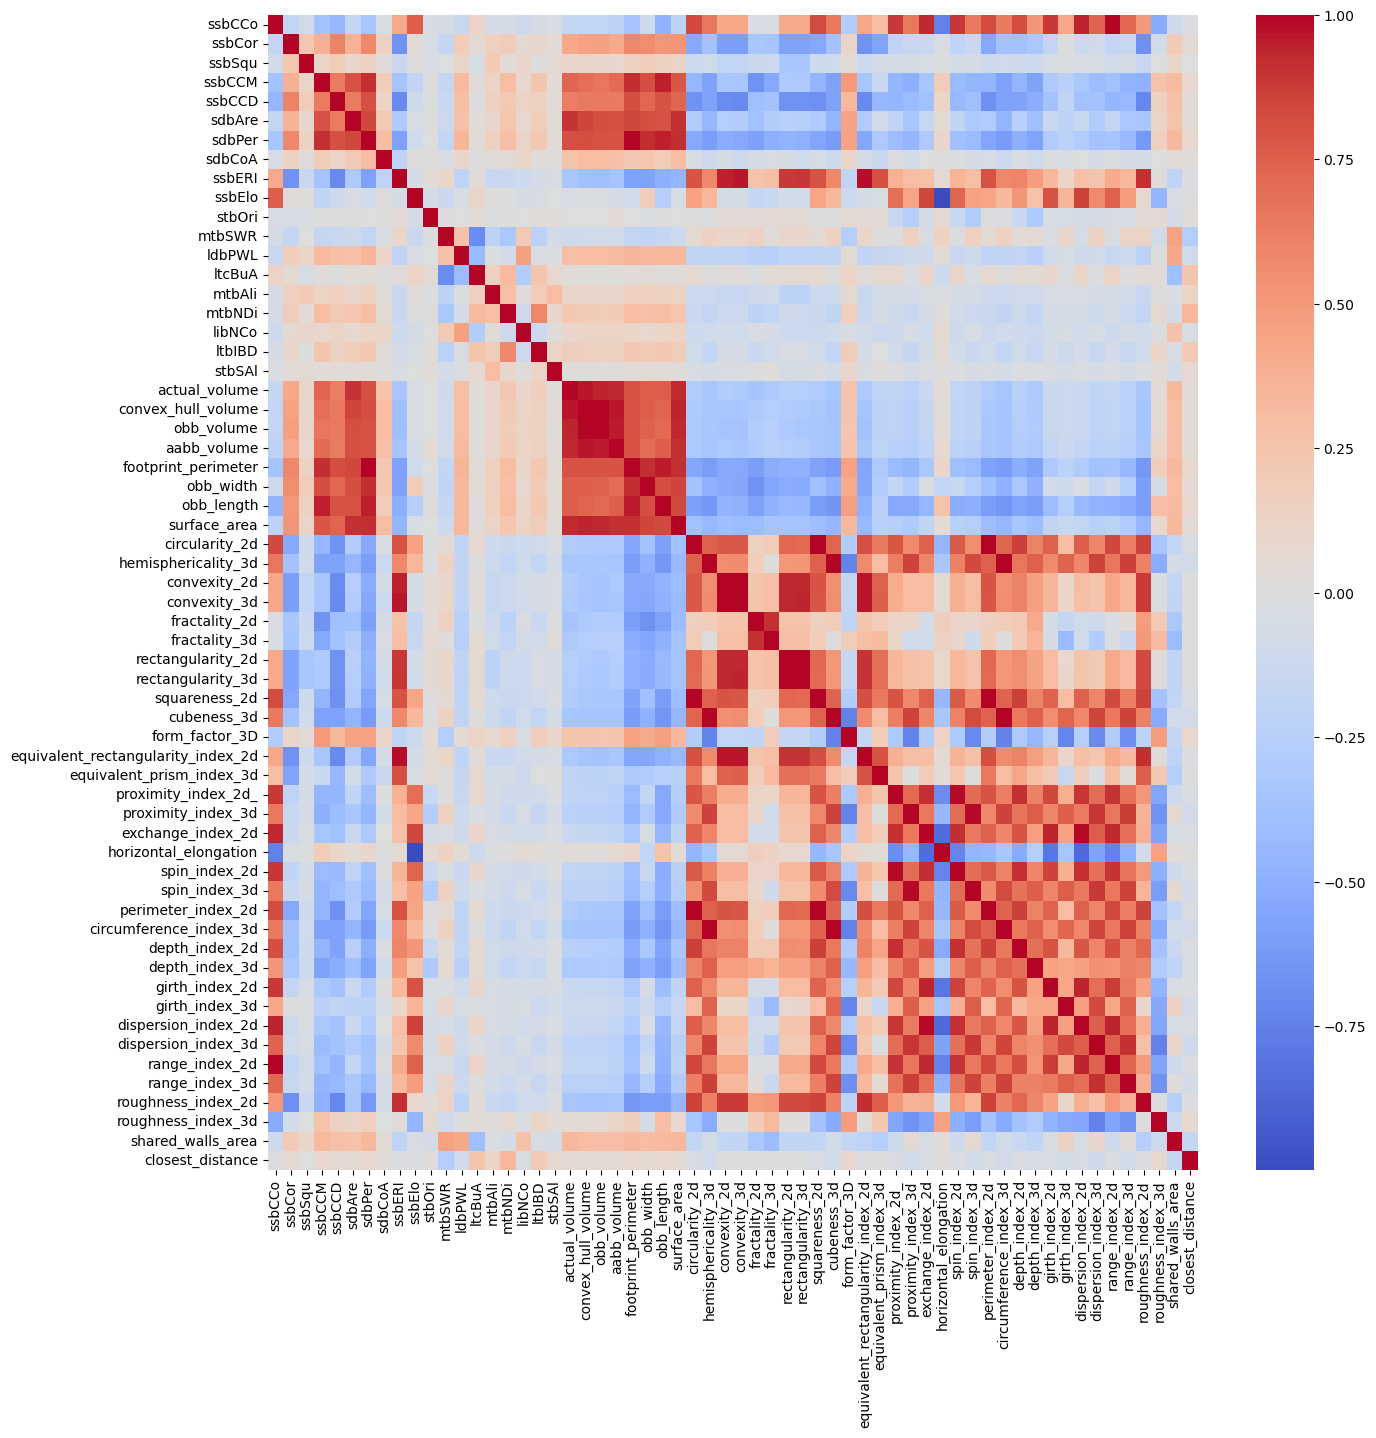

In [138]:
import seaborn as sns
#set figure size
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

In [139]:
import numpy as np

# Set a threshold
threshold = 0.7

# Get the pairs of highly correlated variables
highly_correlated_vars = np.where((correlation_matrix.abs() > threshold) & (correlation_matrix != 1))

# Create a list of variable pairs
correlation_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j]) for i, j in zip(*highly_correlated_vars)]

In [142]:
correlation_pairs

[('ssbCCo', 'ssbElo'),
 ('ssbCCo', 'circularity_2d'),
 ('ssbCCo', 'squareness_2d'),
 ('ssbCCo', 'proximity_index_2d_'),
 ('ssbCCo', 'exchange_index_2d'),
 ('ssbCCo', 'horizontal_elongation'),
 ('ssbCCo', 'spin_index_2d'),
 ('ssbCCo', 'perimeter_index_2d'),
 ('ssbCCo', 'depth_index_2d'),
 ('ssbCCo', 'girth_index_2d'),
 ('ssbCCo', 'dispersion_index_2d'),
 ('ssbCCo', 'dispersion_index_3d'),
 ('ssbCCo', 'range_index_2d'),
 ('ssbCCo', 'range_index_3d'),
 ('ssbCCM', 'sdbAre'),
 ('ssbCCM', 'sdbPer'),
 ('ssbCCM', 'actual_volume'),
 ('ssbCCM', 'aabb_volume'),
 ('ssbCCM', 'footprint_perimeter'),
 ('ssbCCM', 'obb_width'),
 ('ssbCCM', 'obb_length'),
 ('ssbCCM', 'surface_area'),
 ('ssbCCD', 'sdbPer'),
 ('ssbCCD', 'ssbERI'),
 ('ssbCCD', 'footprint_perimeter'),
 ('ssbCCD', 'obb_width'),
 ('ssbCCD', 'obb_length'),
 ('ssbCCD', 'surface_area'),
 ('ssbCCD', 'convexity_2d'),
 ('ssbCCD', 'convexity_3d'),
 ('ssbCCD', 'equivalent_rectangularity_index_2d'),
 ('ssbCCD', 'roughness_index_2d'),
 ('sdbAre', 'ssbC

In [140]:
# Distance matrix: 1 - correlation (for positive correlations)
distance_matrix = 1 - correlation_matrix

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_6694/293710162.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='ward')


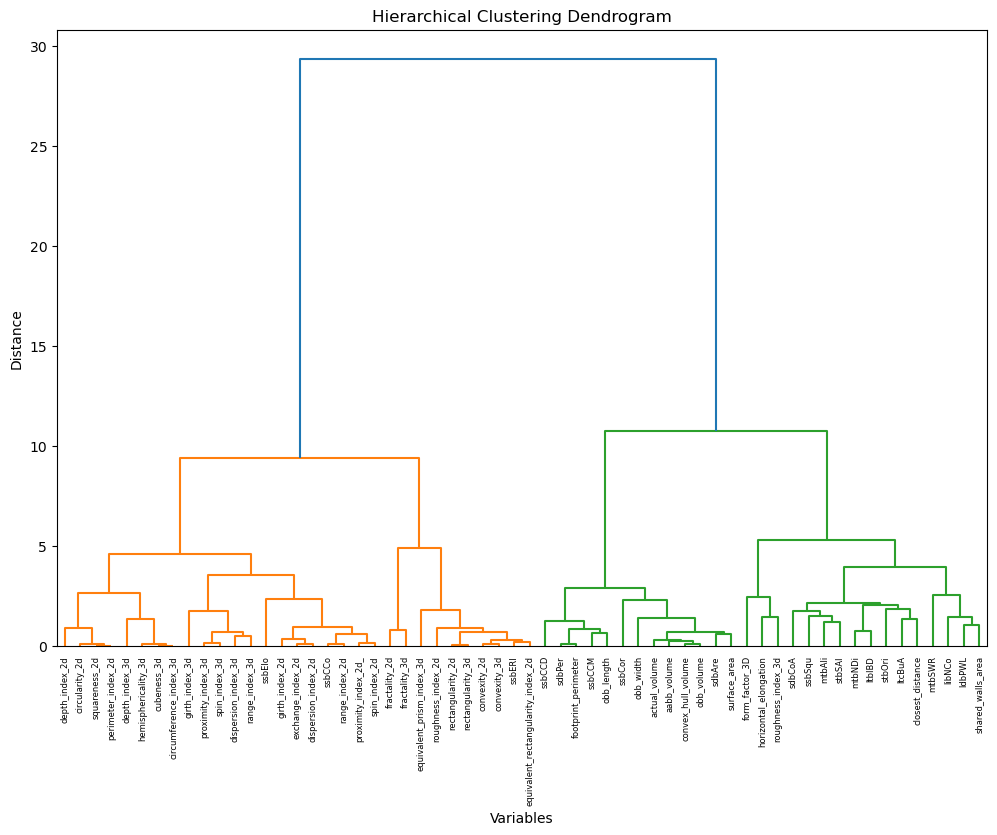

In [141]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(distance_matrix, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=correlation_matrix.columns, orientation='top', leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

In [143]:
from scipy.cluster.hierarchy import fcluster

# Create clusters
max_d = 0.5  # Set your threshold here based on dendrogram
clusters = fcluster(linked, max_d, criterion='distance')

# Create a DataFrame to see which variables belong to which cluster
clustered_vars = pd.DataFrame({'Variable': correlation_matrix.columns, 'Cluster': clusters})


In [144]:
print(clustered_vars.sort_values(by='Cluster'))

                              Variable  Cluster
27                      circularity_2d        1
35                       squareness_2d        1
46                  perimeter_index_2d        1
48                      depth_index_2d        2
36                         cubeness_3d        3
47              circumference_index_3d        3
28                 hemisphericality_3d        3
49                      depth_index_3d        4
45                       spin_index_3d        5
41                  proximity_index_3d        5
55                      range_index_3d        6
53                 dispersion_index_3d        6
51                      girth_index_3d        7
52                 dispersion_index_2d        8
50                      girth_index_2d        8
42                   exchange_index_2d        8
0                               ssbCCo        9
54                      range_index_2d        9
40                 proximity_index_2d_       10
44                       spin_index_2d  

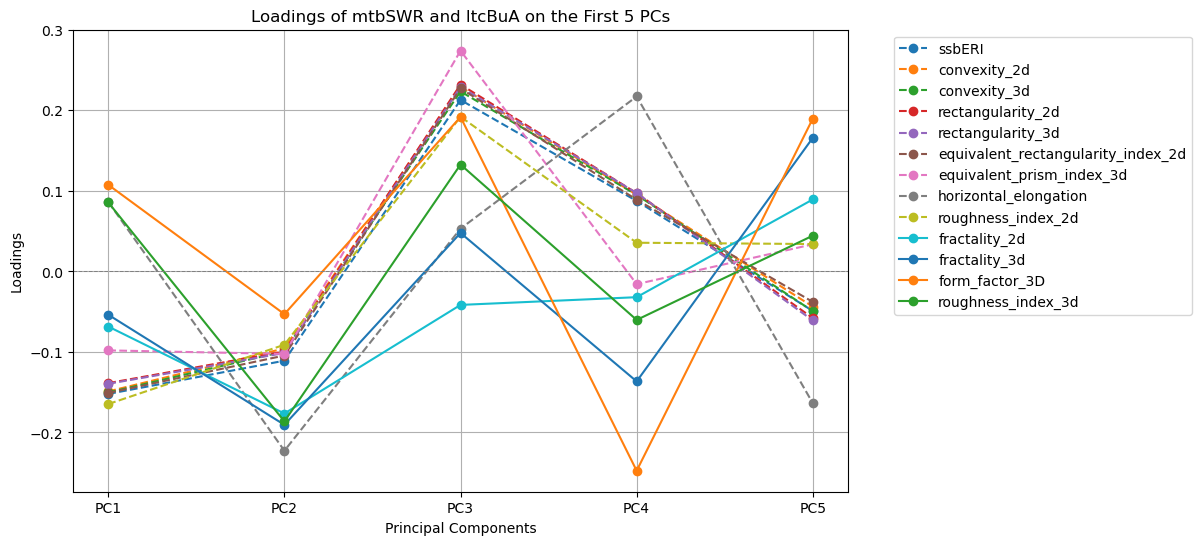

In [ ]:
import matplotlib.pyplot as plt

# Loadings for specific variables
variables_of_interest1 = grouped_variables[0]
variables_of_interest2 = grouped_variables[1]
loadings_of_interest1 = loadings_df.loc[variables_of_interest1]
loadings_of_interest2 = loadings_df.loc[variables_of_interest2]

# Plot the loadings for the first 5 PCs
plt.figure(figsize=(10, 6))
for variable in variables_of_interest1:
    plt.plot(loadings_of_interest1.columns[:5], loadings_of_interest1.loc[variable, loadings_of_interest1.columns[:5]], marker='o', ls='--', label=variable)
for variable in variables_of_interest2:
    plt.plot(loadings_of_interest2.columns[:5], loadings_of_interest2.loc[variable, loadings_of_interest2.columns[:5]], marker='o', label=variable)


plt.title('Loadings of mtbSWR and ltcBuA on the First 5 PCs')
plt.xlabel('Principal Components')
plt.ylabel('Loadings')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0 for reference
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

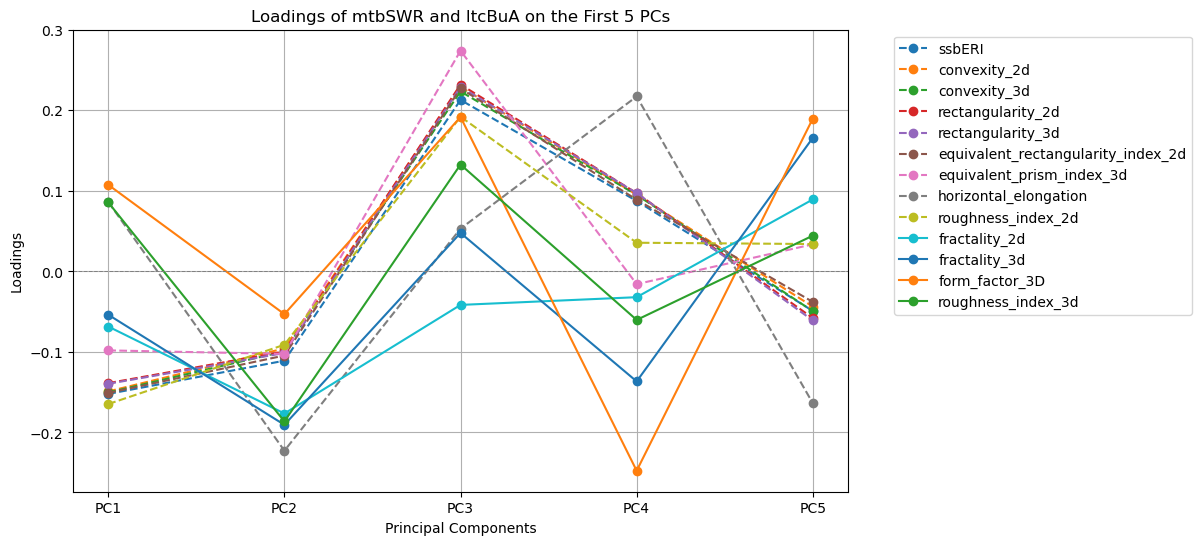

In [ ]:
import matplotlib.pyplot as plt

# Loadings for specific variables
variables_of_interest1 = grouped_variables[0]
variables_of_interest2 = grouped_variables[1]
loadings_of_interest1 = loadings_df.loc[variables_of_interest1]
loadings_of_interest2 = loadings_df.loc[variables_of_interest2]

# Plot the loadings for the first 5 PCs
plt.figure(figsize=(10, 6))
for variable in variables_of_interest1:
    plt.plot(loadings_of_interest1.columns[:5], loadings_of_interest1.loc[variable, loadings_of_interest1.columns[:5]], marker='o', ls='--', label=variable)
for variable in variables_of_interest2:
    plt.plot(loadings_of_interest2.columns[:5], loadings_of_interest2.loc[variable, loadings_of_interest2.columns[:5]], marker='o', label=variable)


plt.title('Loadings of mtbSWR and ltcBuA on the First 5 PCs')
plt.xlabel('Principal Components')
plt.ylabel('Loadings')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0 for reference
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()